## Anomaly detection on credit card   
Financial loss is a constant risk when dealing with transaction online. This project tackle this problem with difference methods:   
+ Unsupervised method: IsolatForest, OneclassSVM, autoencoder
+

1. **Anomaly Detection with IsoletForest**   
IsoletForest return -1 if it is outliear

In [59]:
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.datasets import make_moons, make_blobs
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

import time

import numpy as np
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
#pd.read_csv('C:/training/data/creditcard.csv', parse_dates=['Time'])
data = pd.read_csv('C:/training/data/creditcard.csv')
data = data.drop(['Time'] , axis=1)

In [40]:
outliers = data.loc[data['Class']==1]
normal = data.loc[data['Class']==0]

outliers = outliers.drop(['Class'] , axis=1)
normal = normal.drop(['Class'] , axis=1)


In [5]:
outliers.shape

(492, 29)

In [6]:
normal.shape

(284315, 29)

In [38]:
normal.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [12]:
print("Accuracy dev :", list(y_pred_dev).count(1)/y_pred_dev.shape[0])
print("Accuracy test:", list(y_pred_test).count(-1)/y_pred_test.shape[0])

Accuracy dev : 0.8530709171881166
Accuracy test: 0.8902439024390244


In [41]:
X_train = normal.iloc[0:142403,:]
X_dev = normal.iloc[142403:,:]
X_test = outliers

a. **Contamination='auto'**

In [72]:
# fit the model
rng = np.random.RandomState(42)
clf = IsolationForest(behaviour='new',  n_estimators=100, max_samples='auto',
                      random_state=rng, contamination='auto', n_jobs=-1)
clf.fit(X_train)

IsolationForest(behaviour='new', bootstrap=False, contamination='auto',
        max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=-1,
        random_state=<mtrand.RandomState object at 0x000002D080141438>,
        verbose=0)

In [44]:
y_pred_train = clf.predict(X_train)
y_pred_test  = clf.predict(X_test)
y_pred_outliers = clf.predict(outliers)
print("Accuracy test:", list(y_pred_test).count(-1)/y_pred_test.shape[0])

Accuracy test: 0.8414634146341463


In [83]:
list(y_pred_test).count(-1),y_pred_test.shape[0]

(470, 492)

In [82]:
list(y_pred_outliers).count(-1),y_pred_outliears.shape[0]

(435, 492)

In [ ]:
metrics_df['anomaly']=pred
outliers=metrics_df.loc[metrics_df['anomaly']==-1]
outlier_index=list(outliers.index)
#print(outlier_index)
#Find the number of anomalies and normal points here points classified -1 are anomalous
print(metrics_df['anomaly'].value_counts())

b. **contamination = 0.1** assuming that there is 10% of outliers in dataset. Its better to identify few points which might be normal as anomalous(false positives) ,but not to miss out catching an anomaly(true negative).

In [45]:
# fit the model
rng = np.random.RandomState(42)
clf_of = IsolationForest(behaviour='new', max_samples=100,
                      random_state=rng, contamination=0.1)
clf_of.fit(X_train)

IsolationForest(behaviour='new', bootstrap=False, contamination=0.1,
        max_features=1.0, max_samples=100, n_estimators=100, n_jobs=None,
        random_state=<mtrand.RandomState object at 0x000002D0B0F43750>,
        verbose=0)

In [46]:
y_pred_train = clf_of.predict(X_train)
y_pred_test = clf_of.predict(X_test)
y_pred_outliers = clf_of.predict(outliers)
print("Accuracy test:", list(y_pred_test).count(-1)/y_pred_test.shape[0])

Accuracy test: 0.8841463414634146


2. **OneClassSVM**

In [60]:
clf_osvm = OneClassSVM(nu=outliers_fraction, kernel="rbf", gamma=0.1)
y_pred_test = clf_osvm.fit(train).predict(X_test)
y_pred_test

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1,  1, -1,
       -1, -1,  1,  1,  1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1,  1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1,  1, -1,
       -1, -1, -1, -1, -1

3. **Local Outlier Factor** can be used for moderately high dimensional datasets, the local density is obtained from the k-nearest neighbors . The LOF score of an observation is equal to the ratio of the average local density of his k-nearest neighbors, and its own local density: a normal instance is expected to have a local density similar to that of its neighbors, while abnormal data are expected to have much smaller local density.    

When applying LOF for outlier detection, there are no predict, decision_function and score_samples methods but only a fit_predict method. The scores of abnormality of the training samples are accessible through the negative_outlier_factor_ attribute. 


In [68]:
clf_lof = LocalOutlierFactor(n_neighbors=35, contamination=outliers_fraction)
y_pred = clf_lof.fit_predict(X_train)
y_pred

array([ 1, -1,  1, ...,  1,  1,  1])

4. Robust Covariance   


In [67]:
clf =EllipticEnvelope(contamination=0.12)
y_predict = clf.fit(X_train).predict(X_train)

C:\Users\trisi\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-147.235943836929835 > -147.867966450033919). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\trisi\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-162.174207653463498 > -162.627210876514710). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\trisi\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-185.212965806805244 > -187.373929237578068). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C

In [26]:
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
# use fit_predict to compute the predicted labels of the training samples
# (when LOF is used for outlier detection, the estimator has no predict,
# decision_function and score_samples methods).
y_pred_train = clf.fit_predict(X_train)
n_errors = (y_pred_train != ).sum()
X_scores = clf.negative_outlier_factor_

## Anomal detection with autoencoder   
Autoencoder is a neural network that have the same neurals on both input and output where input data is reconstructed at the output by a minimal neural in hidden layer (so known as encoder - decoder neural network).    

 We only train our model on the normal transactions to allow model learn normal transaction.

In [36]:

import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams

from sklearn.model_selection import train_test_split
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, 
                             classification_report, f1_score, precision_recall_fscore_support)
from sklearn.preprocessing import StandardScaler

In [4]:
#pd.read_csv('C:/training/data/creditcard.csv', parse_dates=['Time'])
df = pd.read_csv('C:/training/data/creditcard.csv')
#data = data.drop(['Time'] , axis=1)
df.shape

(284807, 31)

In [5]:
%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]

In [6]:
#Check for missing values
df.isnull().values.any()

False

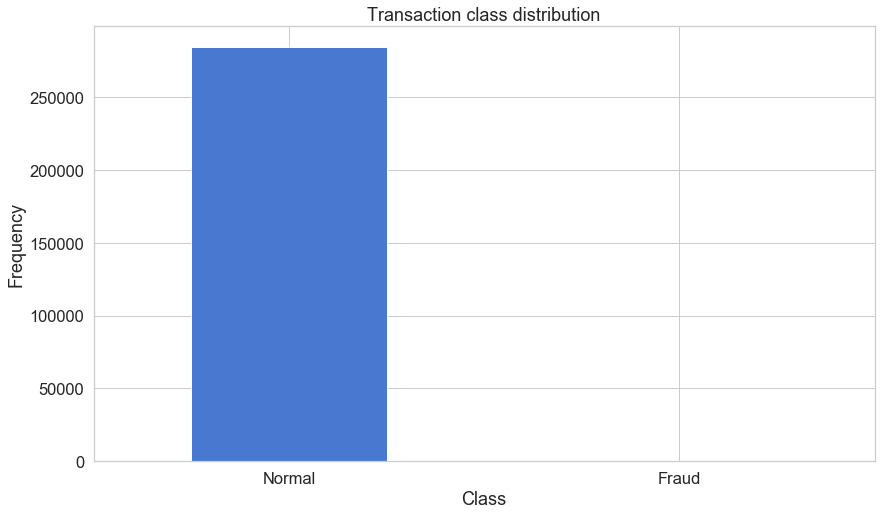

In [7]:
# visualize class 
count_classes = pd.value_counts(df['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

In [11]:
# Check for unbalance 
frauds = df[df.Class == 1]
normal = df[df.Class == 0]
print('fraud = %d '%frauds.shape[0], ', normal =  %d'%normal.shape[0])

fraud = 492  , normal =  284315


In [12]:
#How transaction on fraud cases
frauds.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [14]:
# how normal transaction are?
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

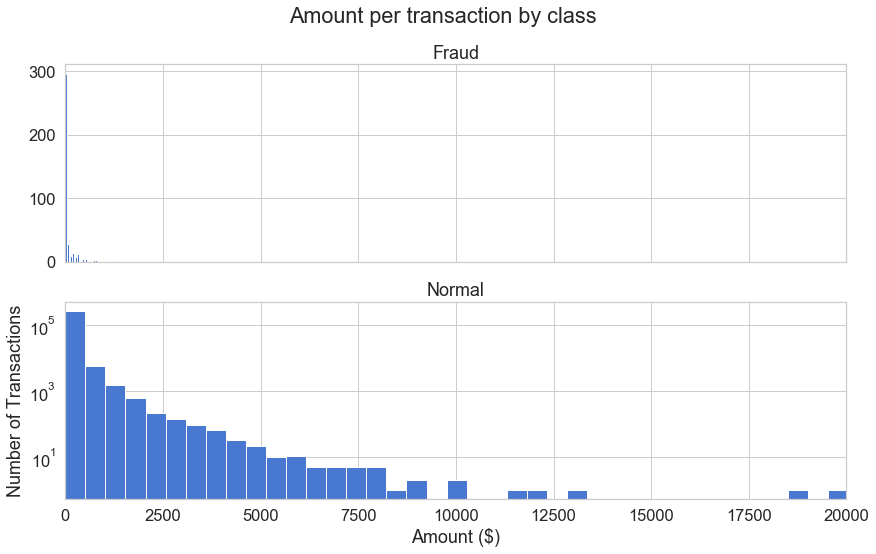

In [15]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')

bins = 50

ax1.hist(frauds.Amount, bins = bins)
ax1.set_title('Fraud')

ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

### Do fraudulent transactions occur more often during certain time?

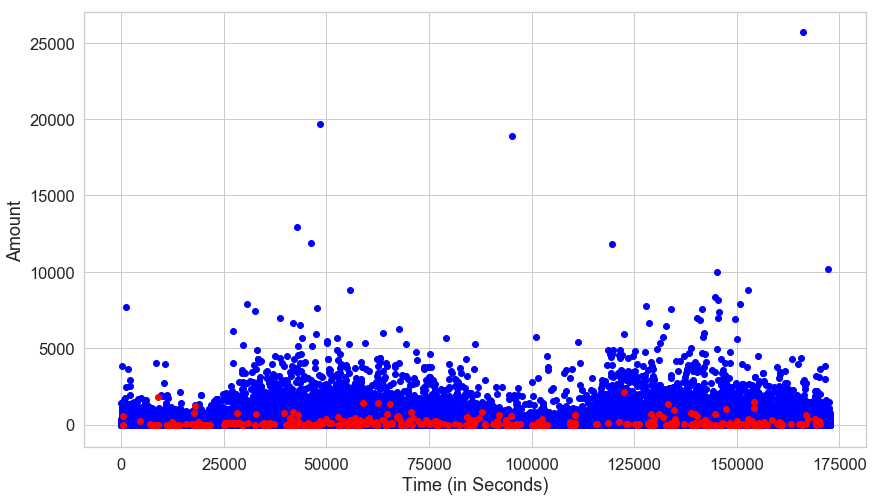

In [21]:
plt.scatter(normal.Time, normal.Amount, c= 'blue')
plt.scatter(frauds.Time, frauds.Amount, c= 'red')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

AS we can see, fraud transaction can occur at any time  

In [23]:
data = df.drop(['Time'], axis=1)
data['Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))

In [24]:
X_train, X_test = train_test_split(data, test_size=0.2, random_state=RANDOM_SEED)
X_train = X_train[X_train.Class == 0]
X_train = X_train.drop(['Class'], axis=1)

y_test = X_test['Class']
X_test = X_test.drop(['Class'], axis=1)

X_train = X_train.values
X_test = X_test.values

In [25]:
X_train.shape

(227451, 29)

### Building the model ###

Our Autoencoder uses 4 fully connected layers with 14, 7, 7 and 29 neurons respectively. The first two layers are used for our encoder, the last two go for the decoder. Additionally, L1 regularization will be used during training:


In [27]:
encoding_dim = 14
input_dim = X_train.shape[1]
input_layer = Input(shape=(input_dim, ))

encoder = Dense(encoding_dim, activation="tanh", 
                activity_regularizer=regularizers.l1(10e-5))(input_layer)

encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)

decoder = Dense(int(encoding_dim / 2), activation='tanh')(encoder)

decoder = Dense(input_dim, activation='relu')(decoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)

In [28]:
nb_epoch = 100
batch_size = 32

autoencoder.compile(optimizer='adam', 
                    loss='mean_squared_error', 
                    metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath="model.h5",
                               verbose=0,
                               save_best_only=True)
tensorboard = TensorBoard(log_dir='./logs',
                          histogram_freq=0,
                          write_graph=True,
                          write_images=True)

history = autoencoder.fit(X_train, X_train,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_test, X_test),
                    verbose=1,
                    callbacks=[checkpointer, tensorboard]).history

Instructions for updating:
Use tf.cast instead.
Train on 227451 samples, validate on 56962 samples
Epoch 1/100
227451/227451 [==============================] - 12s 52us/step - loss: 0.8119 - acc: 0.5788 - val_loss: 0.7898 - val_acc: 0.6267
Epoch 2/100
227451/227451 [==============================] - 10s 46us/step - loss: 0.7491 - acc: 0.6300 - val_loss: 0.7756 - val_acc: 0.6344
Epoch 3/100
227451/227451 [==============================] - 10s 46us/step - loss: 0.7386 - acc: 0.6357 - val_loss: 0.7664 - val_acc: 0.6377
Epoch 4/100
227451/227451 [==============================] - 11s 46us/step - loss: 0.7331 - acc: 0.6368 - val_loss: 0.7625 - val_acc: 0.6396
Epoch 5/100
227451/227451 [==============================] - 11s 47us/step - loss: 0.7300 - acc: 0.6383 - val_loss: 0.7657 - val_acc: 0.6410
Epoch 6/100
227451/227451 [==============================] - 11s 47us/step - loss: 0.7280 - acc: 0.6412 - val_loss: 0.7580 - val_acc: 0.6492
Epoch 7/100
227451/227451 [============================

In [29]:
autoencoder = load_model('model.h5')

## Evaluation

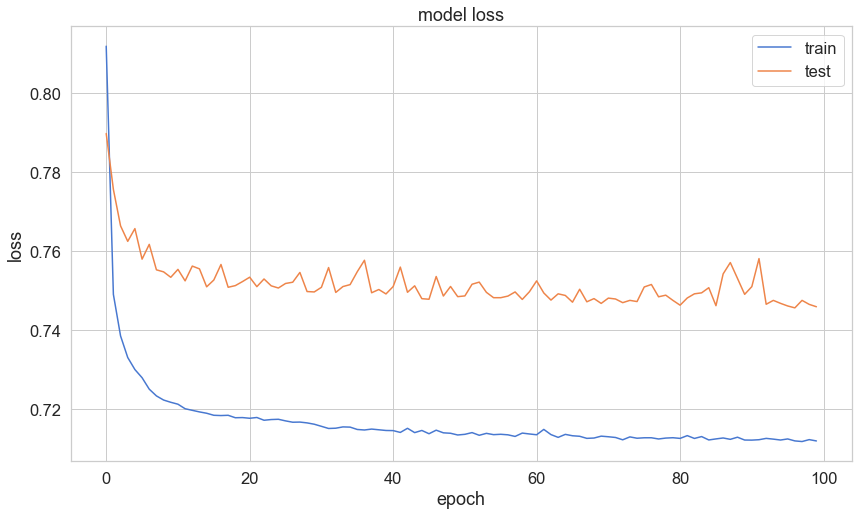

In [32]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

The reconstruction error on our training and test data seems to converge nicely. Is it low enough? Let's have a closer look at the error distribution:

In [33]:
predictions = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse, 'true_class': y_test})

error_df.describe()


,reconstruction_error,true_class
count,56962.000000,56962.000000
mean,0.736967,0.001720
std,3.415526,0.041443
min,0.069477,0.000000
25%,0.245815,0.000000
50%,0.395213,0.000000
75%,0.635651,0.000000
max,266.680851,1.000000


## Reconstruction error without fraud

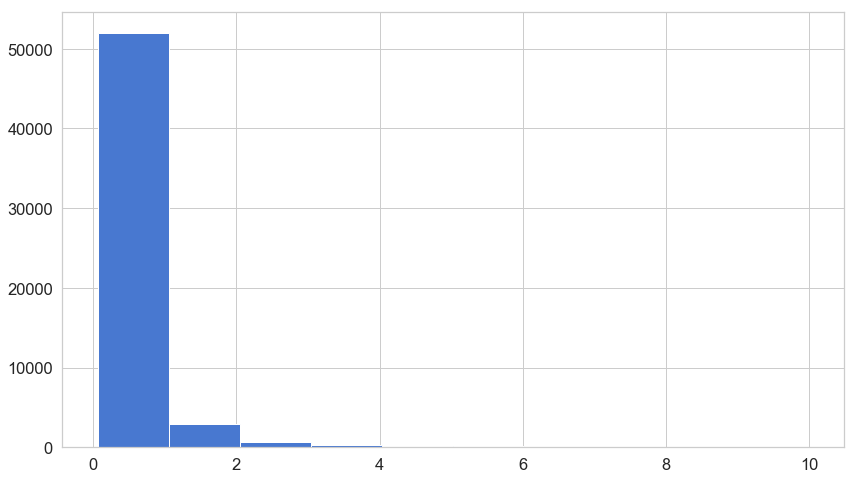

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111)
normal_error_df = error_df[(error_df['true_class']== 0) & (error_df['reconstruction_error'] < 10)]
_ = ax.hist(normal_error_df.reconstruction_error.values, bins=10)

## Reconstruction error with fraud

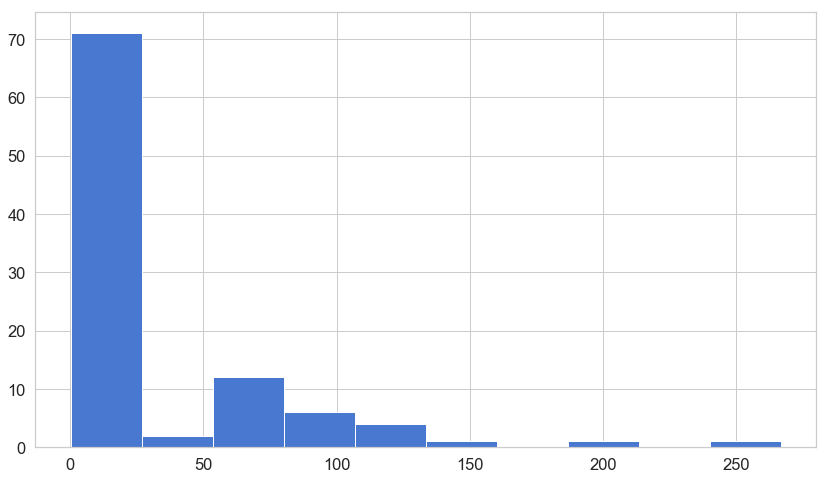

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111)
fraud_error_df = error_df[error_df['true_class'] == 1]
_ = ax.hist(fraud_error_df.reconstruction_error.values, bins=10)

Let's take an example from Information Retrieval in order to better understand what precision and recall are. Precision measures the relevancy of obtained results. Recall, on the other hand, measures how many relevant results are returned. Both values can take values between 0 and 1. You would love to have a system with both values being equal to 1.

Let's return to our example from Information Retrieval. High recall but low precision means many results, most of which has low or no relevancy. When precision is high but recall is low we have the opposite - few returned results with very high relevancy. Ideally, you would want high precision and high recall - many results with that are highly relevant.

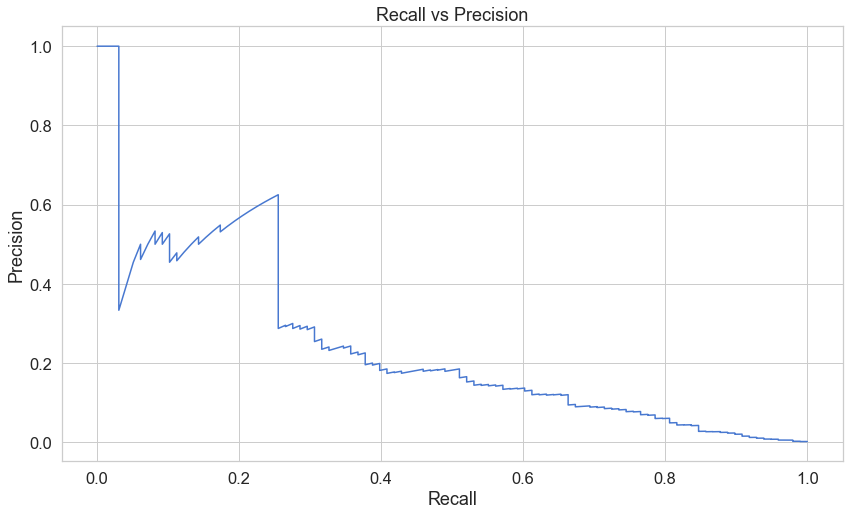

In [37]:
precision, recall, th = precision_recall_curve(error_df.true_class, error_df.reconstruction_error)
plt.plot(recall, precision, 'b', label='Precision-Recall curve')
plt.title('Recall vs Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate. High scores for both show that the classifier is returning accurate results (high precision), as well as returning a majority of all positive results (high recall).

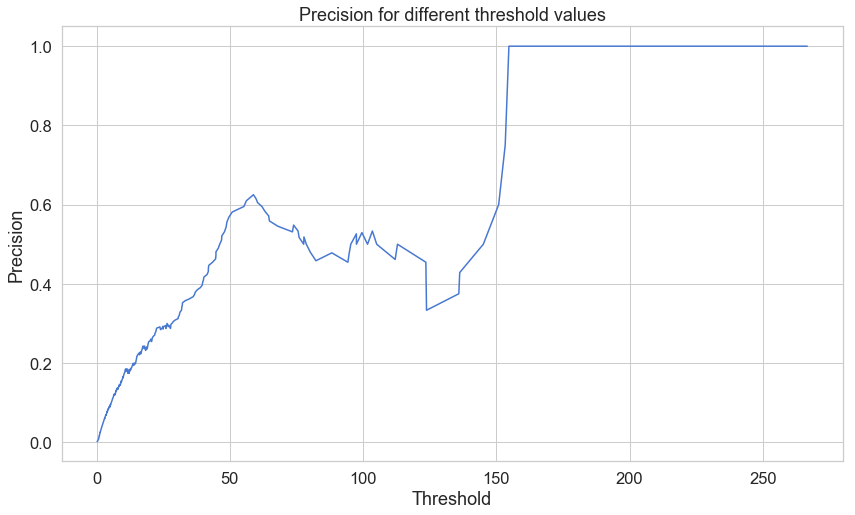

In [38]:
plt.plot(th, precision[1:], 'b', label='Threshold-Precision curve')
plt.title('Precision for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.show()

You can see that as the reconstruction error increases our precision rises as well. Let's have a look at the recall:

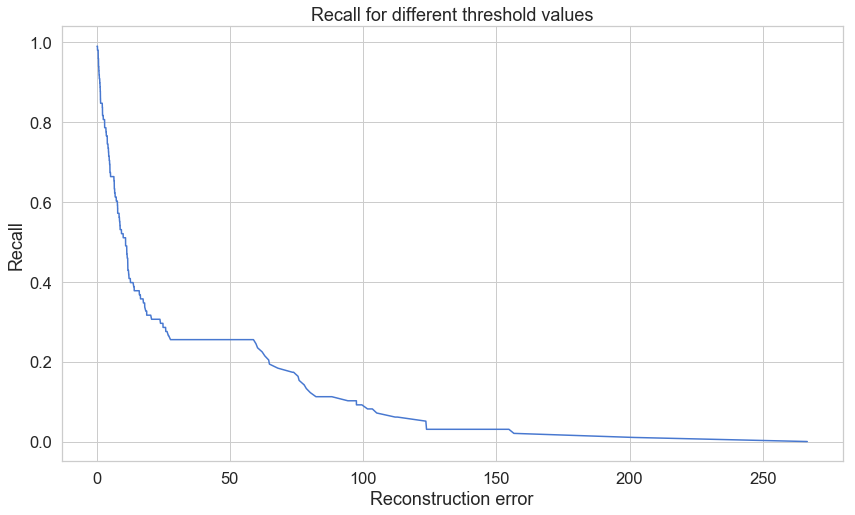

In [39]:
plt.plot(th, recall[1:], 'b', label='Threshold-Recall curve')
plt.title('Recall for different threshold values')
plt.xlabel('Reconstruction error')
plt.ylabel('Recall')
plt.show()

Here, we have the exact opposite situation. As the reconstruction error increases the recall decreases.

## Prediction   

Our model is a bit different this time. It doesn't know how to predict new values. But we don't need that. In order to predict whether or not a new/unseen transaction is normal or fraudulent, we'll calculate the reconstruction error from the transaction data itself. **If the error is larger than a predefined threshold, we'll mark it as a fraud (since our model should have a low error on normal transactions). Let's pick that value:**


In [40]:
threshold = 2.9

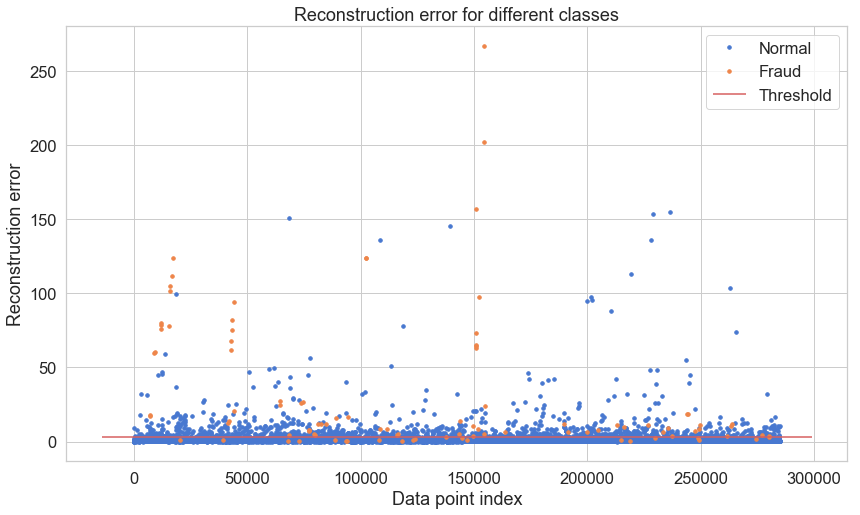

In [41]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

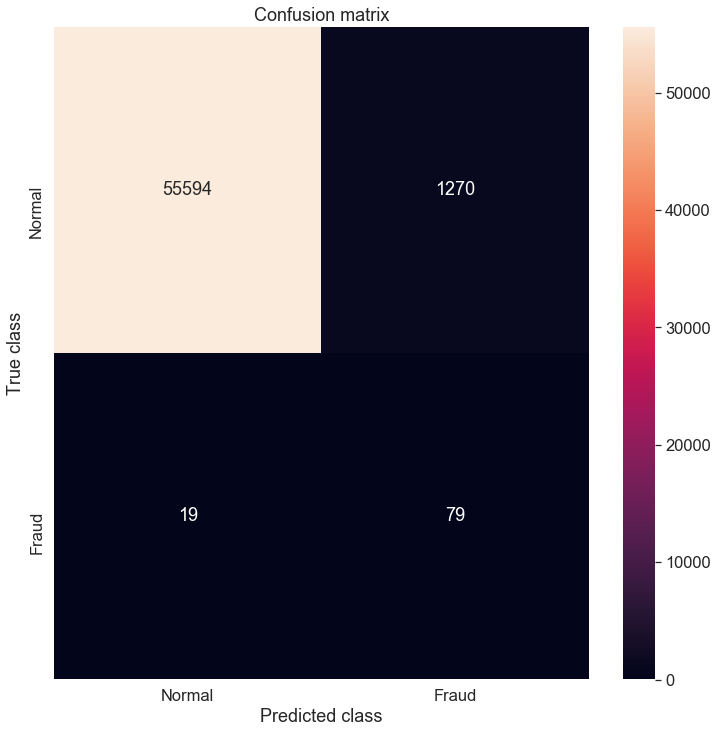

In [42]:
y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)

plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

Our model seems to catch a lot of the fraudulent cases. Of course, there is a catch (see what I did there?). The number of normal transactions classified as frauds is really high. Is this really a problem? Probably it is. You might want to increase or decrease the value of the threshold, depending on the problem.